# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *

In [2]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load files and edit datasets

LAM output analysis.

Simu irr et simu no-irr.

In [3]:
# lon_min=-10
# lon_max=4
# lat_min=34
# lat_max=46

In [4]:
noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/noirr'
irr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/irr'

## LMDZ

In [ ]:
filename = '{}/*/ATM/MO/*.nc'.format(irr_dir)

lmdz_full = xr.open_mfdataset(filename)
lmdz_full = lmdz_full.rename({'time_counter':'time'})
lmdz_full.attrs['name'] = 'no_irr'
lmdz_full = lmdz_full.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))
lmdz_full

In [6]:
LMDZ_TS=False

In [ ]:
#open histmth files
if LMDZ_TS:
    filename = '{}/*/ATM/TS_MO/*.nc'.format(noirr_dir)
    # filename = '{}/ATM/TS_MO*.nc'.format(noirr_dir)
else:
    filename = '{}/*/ATM/MO/*.nc'.format(noirr_dir)

lmdz_noirr0 = xr.open_mfdataset(filename)
lmdz_noirr = lmdz_noirr0.rename({'time_counter':'time'})
lmdz_noirr.attrs['name'] = 'no_irr'
lmdz_noirr.attrs['plot_color']='red'
lmdz_noirr = lmdz_noirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

lmdz_noirr['evap']=lmdz_noirr['evap'] * 3600 * 24
lmdz_noirr['evap'].attrs['units']='mm/d'
lmdz_noirr['evap'].attrs['long_name'] = 'Evapotranspiration'

lmdz_noirr['precip']=lmdz_noirr['precip'] * 3600 * 24
lmdz_noirr['precip'].attrs['long_name'] = 'Total precipitation'
lmdz_noirr['precip'].attrs['units']='mm/d'

lmdz_noirr['sens']=-lmdz_noirr['sens']
lmdz_noirr['flat']=-lmdz_noirr['flat']

lmdz_noirr = compute_grid_cell_width(lmdz_noirr)
lmdz_noirr = add_moisture_divergence(lmdz_noirr)

lmdz_noirr

In [ ]:
if LMDZ_TS:
    filename = '{}/*/ATM/TS_MO/*.nc'.format(irr_dir)
else:
    filename = '{}/*/ATM/MO/*.nc'.format(irr_dir)

lmdz_irr0 = xr.open_mfdataset(filename)
lmdz_irr =lmdz_irr0.rename({'time_counter':'time'})
lmdz_irr.attrs['name'] = 'irr'
lmdz_irr.attrs['plot_color']='#0C5DA5'
lmdz_irr = lmdz_irr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

lmdz_irr['evap']=lmdz_irr['evap'] * 3600 * 24
lmdz_irr['evap'].attrs['units']='mm/d'
lmdz_irr['precip']=lmdz_irr['precip'] * 3600 * 24
lmdz_irr['precip'].attrs['units']='mm/d'
lmdz_irr['sens']=-lmdz_irr['sens']
lmdz_irr['flat']=-lmdz_irr['flat']

lmdz_irr = compute_grid_cell_width(lmdz_irr)
lmdz_irr = add_moisture_divergence(lmdz_irr)
lmdz_irr

In [ ]:
if LMDZ_TS:
    # drop unused coordinates
    lmdz_noirr = lmdz_noirr.drop_vars('presnivs')
    lmdz_noirr = lmdz_noirr.drop_vars('time_centered')
    lmdz_irr = lmdz_irr.drop_vars('presnivs')
    lmdz_irr = lmdz_irr.drop_vars('time_centered')
    print('using TimeSeries outputs')

else:
    #add var t1 to lmdz datasets (first level of temp)
    lmdz_noirr['t1']    = lmdz_noirr['temp'][:,0,:,:]
    lmdz_noirr['t1'].attrs['long_name'] = 'Temperature at first level'
    lmdz_noirr['t1'].attrs['units']='K'
    
    lmdz_irr['t1']      = lmdz_irr['temp'][:,0,:,:]
    lmdz_irr['t1'].attrs['long_name'] = 'Temperature at first level'
    lmdz_irr['t1'].attrs['units']='K'

    lmdz_noirr['Altitude'] = lmdz_noirr['phis'] / 9.81
    lmdz_noirr['Altitude'].attrs['units'] = 'm'
    lmdz_noirr['Altitude'].attrs['long_name'] = 'Altitude'
    
    print('using full outputs')

## ORCHIDEE

In [ ]:
filename = '{}/*/SRF/MO/*history.nc'.format(irr_dir)

orc_full = xr.open_mfdataset(filename)
orc_full = orc_full.rename({'time_counter':'time'})
orc_full.attrs['name'] = 'irr'
orc_full = orc_full.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

orc_full['irrig_frac'] = orc_full['irrigmap_dyn']/orc_full['Areas'] * 100
orc_full['irrig_frac'].attrs['units'] = '%'

orc_full

In [ ]:
# filename = '{}/*/SRF/MO/*sechiba_history.nc'.format(noirr_dir)
filename = '{}/*/SRF/TS_MO/*.nc'.format(noirr_dir)

orc_noirr0 = xr.open_mfdataset(filename)
orc_noirr = orc_noirr0.rename({'time_counter':'time'})
orc_noirr.attrs['name'] = 'no_irr'
orc_noirr.attrs['plot_color']='red'
orc_noirr = orc_noirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

orc_noirr['irrig_frac'] = orc_full['irrig_frac']
orc_noirr['irrigation'] = orc_full['irrigation'][:,:,:]

orc_noirr

In [ ]:
# filename = '{}/*/SRF/MO/*history.nc'.format(irr_dir)
filename = '{}/*/SRF/TS_MO/*.nc'.format(irr_dir)

orc_irr0 = xr.open_mfdataset(filename)
orc_irr = orc_irr0.rename({'time_counter':'time'})
orc_irr.attrs['name'] = 'irr'
orc_irr.attrs['plot_color']='#0C5DA5'
orc_irr = orc_irr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

orc_irr['irrigation'] = orc_full['irrigation'][:,:,:]
orc_irr['irrig_frac'] = orc_full['irrig_frac']

orc_irr

## Period selection

In [13]:
# Select months
months=[6,7,8]
# lmdz_irr =lmdz_irr.sel(time=lmdz_irr['time.month'].isin(months))
# lmdz_noirr = lmdz_noirr.sel(time=lmdz_noirr['time.month'].isin(months))
# lmdz_full = lmdz_full.sel(time=lmdz_full['time.month'].isin(months))

# orc_irr = orc_irr.sel(time=orc_irr['time.month'].isin(months))
# orc_noirr = orc_noirr.sel(time=orc_noirr['time.month'].isin(months))
# orc_full = orc_full.sel(time=orc_full['time.month'].isin(months))

## Masking

### IP continental subdomain

In [14]:
# Define masks
 
con_mask_2D_ORC= orc_full.mean(dim='time')['Contfrac']>0.95
con_mask_2D_ORC.attrs['name']='Continental mask (95%)'

ip_polygon_mask_2D=polygon_to_mask(orc_noirr.mean(dim="time"), iberian_peninsula)
ip_polygon_mask_2D.attrs['name']='Iberian Peninsula polygon mask'

#combine two masks
ip_mask = con_mask_2D_ORC * ip_polygon_mask_2D
ip_mask.attrs['name']='IPmask'

In [15]:
#ORC
# ip_orc_noirr    = orc_noirr.where(con_mask_ORC).where(ip_mask_ORC['mask'])
# ip_orc_irr      = orc_irr.where(con_mask_ORC).where(ip_mask_ORC['mask'])
ip_orc_noirr = apply_2Dmask_to_dataset(orc_noirr, ip_mask, dsname='no_irr')
ip_orc_irr = apply_2Dmask_to_dataset(orc_irr, ip_mask, dsname='irr')

In [16]:
#LMDZ
# ip_lmdz_noirr   = lmdz_noirr.where(con_mask_ORC).where(ip_mask_ORC['mask'])
# ip_lmdz_irr     = lmdz_irr.where(con_mask_ORC).where(ip_mask_ORC['mask'])
ip_lmdz_noirr = apply_2Dmask_to_dataset(lmdz_noirr, ip_mask, dsname='no_irr')
ip_lmdz_irr = apply_2Dmask_to_dataset(lmdz_irr, ip_mask, dsname='irr')

In [17]:
# Full irrsims
# ip_orc_full     = apply_2Dmask_to_dataset(orc_full, ip_mask, dsname='irr')
# ip_lmdz_full    = apply_2Dmask_to_dataset(lmdz_full, ip_mask, dsname='irr')

### Irrigated areas

In [18]:
# Old masks and methods
#create a masks of data points where irrig_frac >5%
# irr_mask = (orc_full['irrigmap_dyn']/orc_full['Areas'])>0.05

#irrigated vs nonirr areas
# irr_orc_noirr=orc_noirr.where(irr_mask)
# irr_orc_irr=orc_irr.where(irr_mask)
# irr_lmdz_noirr=lmdz_noirr.where(irr_mask)
# irr_lmdz_irr=lmdz_irr.where(irr_mask)

# irr_ip_orc_noirr=ip_orc_noirr.where(irr_mask)
# irr_ip_orc_irr=ip_orc_irr.where(irr_mask)
# irr_ip_lmdz_noirr=ip_lmdz_noirr.where(irr_mask)
# irr_ip_lmdz_irr=ip_lmdz_irr.where(irr_mask)

# #non irrigated areas
# nonirr_orc_noirr=orc_noirr.where(~irr_mask)
# nonirr_orc_irr=orc_irr.where(~irr_mask)
# nonirr_lmdz_noirr=lmdz_noirr.where(~irr_mask)
# nonirr_lmdz_irr=lmdz_irr.where(~irr_mask)

# nonirr_ip_orc_noirr=ip_orc_noirr.where(~irr_mask)
# nonirr_ip_orc_irr=ip_orc_irr.where(~irr_mask)
# nonirr_ip_lmdz_noirr=ip_lmdz_noirr.where(~irr_mask)
# nonirr_ip_lmdz_irr=ip_lmdz_irr.where(~irr_mask)

#for both full datasets
# ip_orc_full=orc_full.where(ip_mask_ORC['mask']).where(con_mask_ORC)
# ip_lmdz_full=lmdz_full.where(ip_mask_ORC['mask']).where(con_mask_ORC)
# irr_ip_orc_full=ip_orc_full.where(irr_mask)
# nonirr_ip_orc_full=ip_orc_full.where(~irr_mask)

In [19]:
# Define 2D masks

# Applied irrigation
irr_mask_low    = ip_orc_irr.mean(dim='time')['irrigation']<0.05
irr_mask_high   = ip_orc_irr.mean(dim='time')['irrigation']>0.1
irr_mask_med    = (~irr_mask_low) * (~irr_mask_high) * ip_mask

In [20]:
#irrigated fraction
# irr_mask5   = ip_orc_full.mean(dim='time')['irrig_frac']<5
# irr_mask10  = ip_orc_full.mean(dim='time')['irrig_frac']<10
# irr_mask15  = ip_orc_full.mean(dim='time')['irrig_frac']<15
# irr_mask20  = ip_orc_full.mean(dim='time')['irrig_frac']<20
# irr_mask30  = ip_orc_full.mean(dim='time')['irrig_frac']<30
# irr_mask40  = ip_orc_full.mean(dim='time')['irrig_frac']<40

In [21]:
# Define datasets orc
lowirr_ip_orc_noirr = apply_2Dmask_to_dataset(ip_orc_noirr, irr_mask_low, dsname='lowirr_noirr')
lowirr_ip_orc_irr = apply_2Dmask_to_dataset(ip_orc_irr, irr_mask_low, dsname='lowirr_irr')

medirr_ip_orc_noirr = apply_2Dmask_to_dataset(ip_orc_noirr, irr_mask_med, dsname='medirr_noirr')
medirr_ip_orc_irr = apply_2Dmask_to_dataset(ip_orc_irr, irr_mask_med, dsname='medirr_irr')

highirr_ip_orc_noirr = apply_2Dmask_to_dataset(ip_orc_noirr, irr_mask_high, dsname='highirr_noirr')
highirr_ip_orc_irr = apply_2Dmask_to_dataset(ip_orc_irr, irr_mask_high, dsname='highirr_irr')

In [22]:
#Define datasets lmdz
lowirr_ip_lmdz_irr = apply_2Dmask_to_dataset(ip_lmdz_irr, irr_mask_low, dsname='lowirr_irr')
lowirr_ip_lmdz_noirr = apply_2Dmask_to_dataset(ip_lmdz_noirr, irr_mask_low, dsname='lowirr_noirr')

medirr_ip_lmdz_irr = apply_2Dmask_to_dataset(ip_lmdz_irr, irr_mask_med, dsname='medirr_irr')
medirr_ip_lmdz_noirr = apply_2Dmask_to_dataset(ip_lmdz_noirr, irr_mask_med, dsname='medirr_noirr')

highirr_ip_lmdz_irr = apply_2Dmask_to_dataset(ip_lmdz_irr, irr_mask_high, dsname='highirr_irr')
highirr_ip_lmdz_noirr = apply_2Dmask_to_dataset(ip_lmdz_noirr, irr_mask_high, dsname='highirr_noirr')

## Mean, difference, and (spatially) aggregated datasets

In [23]:
# ip_orc_noirr_mean=ip_orc_noirr.mean(dim='time')
# ip_orc_noirr_mean.attrs['name']='IP ORC no_irr'
# ip_orc_irr_mean=ip_orc_irr.mean(dim='time')
# ip_orc_irr_mean.attrs['name']='IP ORC irr'
# ip_lmdz_noirr_mean=ip_lmdz_noirr.mean(dim='time')
# ip_lmdz_noirr_mean.attrs['name']='IP LMDZ no_irr'
# ip_lmdz_irr_mean=ip_lmdz_irr.mean(dim='time')
# ip_lmdz_irr_mean.attrs['name']='IP LMDZ irr'

# orc_full_mean=orc_full.mean(dim='time')
# orc_full_mean.attrs['name']='ORC irr'
# lmdz_full_mean=lmdz_full.mean(dim='time')
# lmdz_full_mean.attrs['name']='LMDZ irr'

# ip_orc_full_mean=ip_orc_full.mean(dim='time')
# ip_orc_full_mean.attrs['name']='IP ORC irr'
# ip_lmdz_full_mean=ip_lmdz_full.mean(dim='time')
# ip_lmdz_full_mean.attrs['name']='IP LMDZ irr'

In [24]:
#old aggr datasets
# # ip_orc_full_aggr = ip_orc_full.mean(dim='lon').mean(dim='lat')
# ip_lmdz_full_aggr = ip_lmdz_full.mean(dim='lon').mean(dim='lat')
# ip_orc_irr_aggr = ip_orc_irr.mean(dim='lon').mean(dim='lat')
# ip_lmdz_irr_aggr = ip_lmdz_irr.mean(dim='lon').mean(dim='lat')
# ip_orc_noirr_aggr = ip_orc_noirr.mean(dim='lon').mean(dim='lat')
# ip_lmdz_noirr_aggr = ip_lmdz_noirr.mean(dim='lon').mean(dim='lat')
# ip_orc_diff_aggr = ip_orc_diff.mean(dim='lon').mean(dim='lat')
# ip_lmdz_diff_aggr = ip_lmdz_diff.mean(dim='lon').mean(dim='lat')

# irr_ip_orc_full_aggr = irr_ip_orc_full.mean(dim='lon').mean(dim='lat')
# irr_ip_orc_irr_aggr = irr_ip_orc_irr.mean(dim='lon').mean(dim='lat')
# irr_ip_lmdz_irr_aggr = irr_ip_lmdz_irr.mean(dim='lon').mean(dim='lat')
# irr_ip_orc_noirr_aggr = irr_ip_orc_noirr.mean(dim='lon').mean(dim='lat')
# irr_ip_lmdz_noirr_aggr = irr_ip_lmdz_noirr.mean(dim='lon').mean(dim='lat')
# nonirr_ip_orc_full_aggr = nonirr_ip_orc_full.mean(dim='lon').mean(dim='lat')

#name new datasets
# ip_orc_full_aggr.attrs['name']='ORC irr IP mean'
# ip_lmdz_full_aggr.attrs['name']='LMDZ irr IP mean'
# ip_orc_irr_aggr.attrs['name']='ORC irr IP mean'
# ip_lmdz_irr_aggr.attrs['name']='LMDZ irr IP mean'
# ip_orc_noirr_aggr.attrs['name']='ORC no_irr IP mean'
# ip_lmdz_noirr_aggr.attrs['name']='LMDZ no_irr IP mean'
# ip_orc_diff_aggr.attrs['name']='ORC diff IP mean'
# ip_lmdz_diff_aggr.attrs['name']='LMDZ diff IP mean'

# irr_ip_orc_full_aggr.attrs['name']='ORC_irr IP irrZone mean'
# irr_ip_orc_irr_aggr.attrs['name']='ORC_irr IP irrZone mean'
# irr_ip_lmdz_irr_aggr.attrs['name']='LMDZ_irr IP irrZone mean'
# irr_ip_orc_noirr_aggr.attrs['name']='ORC_no_irr IP irrZone mean'
# irr_ip_lmdz_noirr_aggr.attrs['name']='LMDZ_no_irr IP irrZone mean'
# nonirr_ip_orc_full_aggr.attrs['name']='ORC_irr IP nonirrZone mean'

#add irr and nonirr distinction for diff datasets
# irr_ip_orc_diff_aggr = irr_ip_orc_diff.mean(dim='lon').mean(dim='lat')
# nonirr_ip_orc_diff_aggr = nonirr_ip_orc_diff.mean(dim='lon').mean(dim='lat')

# irr_ip_orc_diff_aggr.attrs['name']='ORC diff IP irrZone mean'
# nonirr_ip_orc_diff_aggr.attrs['name']='ORC diff IP nonirrZone mean'

In [25]:
# Temporal mean for IP sims

ip_orc_noirr_mean = mean_dataset(ip_orc_noirr)
ip_orc_irr_mean = mean_dataset(ip_orc_irr)
ip_lmdz_noirr_mean = mean_dataset(ip_lmdz_noirr)
ip_lmdz_irr_mean = mean_dataset(ip_lmdz_irr)

#Full
# ip_orc_full_mean = mean_dataset(ip_orc_full)
# ip_lmdz_full_mean = mean_dataset(ip_lmdz_full)

#by irrig class
lowirr_ip_orc_noirr_mean = mean_dataset(lowirr_ip_orc_noirr)
lowirr_ip_orc_irr_mean = mean_dataset(lowirr_ip_orc_irr)
medirr_ip_orc_noirr_mean = mean_dataset(medirr_ip_orc_noirr)
medirr_ip_orc_irr_mean = mean_dataset(medirr_ip_orc_irr)
highirr_ip_orc_noirr_mean = mean_dataset(highirr_ip_orc_noirr)
highirr_ip_orc_irr_mean = mean_dataset(highirr_ip_orc_irr)

In [26]:
#diff
lmdz_diff, lmdz_diff_mean = diff_dataset(lmdz_irr, lmdz_noirr)
#over whole IP
ip_orc_diff, ip_orc_diff_mean = diff_dataset(ip_orc_irr, ip_orc_noirr)
ip_lmdz_diff, ip_lmdz_diff_mean = diff_dataset(ip_lmdz_irr, ip_lmdz_noirr)

#by irrig class
lowirr_ip_orc_diff, lowirr_ip_orc_diff_mean     = diff_dataset(lowirr_ip_orc_irr, lowirr_ip_orc_noirr)
medirr_ip_orc_diff, medirr_ip_orc_diff_mean     = diff_dataset(medirr_ip_orc_irr, medirr_ip_orc_noirr)
highirr_ip_orc_diff, highirr_ip_orc_diff_mean   = diff_dataset(highirr_ip_orc_irr, highirr_ip_orc_noirr)

lowirr_ip_lmdz_diff, lowirr_ip_lmdz_diff_mean   = diff_dataset(lowirr_ip_lmdz_irr, lowirr_ip_lmdz_noirr)
medirr_ip_lmdz_diff, medirr_ip_lmdz_diff_mean   = diff_dataset(medirr_ip_lmdz_irr, medirr_ip_lmdz_noirr)
highirr_ip_lmdz_diff, highirr_ip_lmdz_diff_mean = diff_dataset(highirr_ip_lmdz_irr, highirr_ip_lmdz_noirr)

In [27]:
#spatial aggregation over domain or subdomain
#Whole IP domain
ip_orc_noirr_aggr = aggr_dataset(ip_orc_noirr)
ip_orc_irr_aggr = aggr_dataset(ip_orc_irr)
ip_lmdz_noirr_aggr = aggr_dataset(ip_lmdz_noirr)
ip_lmdz_irr_aggr = aggr_dataset(ip_lmdz_irr)

ip_orc_diff_aggr = aggr_dataset(ip_orc_diff)
ip_lmdz_diff_aggr = aggr_dataset(ip_lmdz_diff)

# By irrigation class
# ORC
lowirr_ip_orc_noirr_aggr = aggr_dataset(lowirr_ip_orc_noirr)
lowirr_ip_orc_irr_aggr = aggr_dataset(lowirr_ip_orc_irr)
lowirr_ip_orc_diff_aggr = aggr_dataset(lowirr_ip_orc_diff)

medirr_ip_orc_noirr_aggr = aggr_dataset(medirr_ip_orc_noirr)
medirr_ip_orc_irr_aggr = aggr_dataset(medirr_ip_orc_irr)
medirr_ip_orc_diff_aggr = aggr_dataset(medirr_ip_orc_diff)

highirr_ip_orc_noirr_aggr = aggr_dataset(highirr_ip_orc_noirr)
highirr_ip_orc_irr_aggr = aggr_dataset(highirr_ip_orc_irr)
highirr_ip_orc_diff_aggr = aggr_dataset(highirr_ip_orc_diff)

# LMDZ
lowirr_ip_lmdz_irr_aggr = aggr_dataset(lowirr_ip_lmdz_irr)
lowirr_ip_lmdz_noirr_aggr = aggr_dataset(lowirr_ip_lmdz_noirr)
lowirr_ip_lmdz_diff_aggr = aggr_dataset(lowirr_ip_lmdz_diff)

medirr_ip_lmdz_irr_aggr = aggr_dataset(medirr_ip_lmdz_irr)
medirr_ip_lmdz_noirr_aggr = aggr_dataset(medirr_ip_lmdz_noirr)
medirr_ip_lmdz_diff_aggr = aggr_dataset(medirr_ip_lmdz_diff)

highirr_ip_lmdz_irr_aggr = aggr_dataset(highirr_ip_lmdz_irr)
highirr_ip_lmdz_noirr_aggr = aggr_dataset(highirr_ip_lmdz_noirr)
highirr_ip_lmdz_diff_aggr = aggr_dataset(highirr_ip_lmdz_diff)

# Maps

In [28]:
#make cin positive
ip_lmdz_noirr['cin'] = -ip_lmdz_noirr['cin']
ip_lmdz_irr['cin'] = -ip_lmdz_irr['cin']

In [29]:
ip_orc_diff_mean['deltaET_minus_irrig'] = ip_orc_diff_mean['evap'] - ip_orc_irr_mean['irrigation']

In [30]:
#define evaporative fraction
ip_orc_noirr['evap_frac'] = ip_orc_noirr['fluxlat'] / (ip_orc_noirr['fluxlat'] + ip_orc_noirr['fluxsens'])
ip_orc_irr['evap_frac'] = ip_orc_irr['fluxlat'] / (ip_orc_irr['fluxlat'] + ip_orc_irr['fluxsens'])
# add units
ip_orc_noirr['evap_frac'].attrs['units']=''
ip_orc_irr['evap_frac'].attrs['units']=''

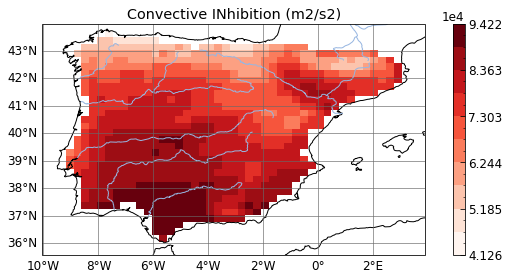

In [31]:
var='cin'
ds=ip_lmdz_noirr

months=[6,7,8]
ds = ds.sel(time=ds['time.month'].isin(months))

vmin=0
vmax=0.75
vmin,vmax = None, None
cmap=reds
# title='off'
title=None
# title='Evaporative fraction (irr, JJA)'
# clabel='Irrigation (mm/d)'
clabel=None
map_ave(ds, var, vmin=vmin, vmax=vmax, cmap=cmap,
        title=title, clabel=clabel)

In [32]:
var=''
ds=ip_orc_noirr_mean
vmin=-0.0
vmax= 1
vmin,vmax = None, None
cmap=reds
map_plotvar(ds[var], vmin=vmin, vmax=vmax, cmap=cmap)

KeyError: ''

In [62]:
#Diff map
var='cin'
ds1=ip_lmdz_irr
ds2=ip_lmdz_noirr

vmax= 3000
vmin=-3000
# vmin,vmax = None, None
cmap=emb_neutral
pvalue=0.05
sig_method=1
check_norm=False
sig_viz=6
# title='off'
title=None
# clabel='Convergence change (mm/d)'
clabel=None

#chose matplotlib hatch styles
mpl.rcParams['hatch.linewidth'] = 0.7
mpl.rcParams['hatch.color'] = 'black'

In [63]:
months=[6,7,8]
ds1 = ds1.sel(time=ds1['time.month'].isin(months))
ds2 = ds2.sel(time=ds2['time.month'].isin(months))

In [64]:
# map_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax, cmap=cmap, 
#              sig=False,
#              title=title, clabel=clabel)

In [ ]:
map_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax, cmap=cmap, 
             sig=True, sig_method=sig_method, sig_viz=sig_viz, check_norm=check_norm, 
             hatch='xxx', pvalue=pvalue,
             title=title, clabel=clabel)

In [ ]:
map_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax, cmap=cmap, 
             sig=True, sig_method=sig_method, sig_viz=0, pvalue=pvalue)

In [ ]:
maxvalue= 5
minvalue=-5
# minvalue,maxvalue = None, None
map_rel_diff_ave(ds1, ds2, var, cmap=cmap, vmin=minvalue, vmax=maxvalue)

In [ ]:
brr

In [ ]:
#Relative diff map
var='cape'
maxvalue= 50
minvalue=-50
# minvalue, maxvalue = None, None

months=[6,7,8]
ds1=ip_lmdz_irr.sel(time=ip_lmdz_irr['time.month'].isin(months))
ds2=ip_lmdz_noirr.sel(time=ip_lmdz_noirr['time.month'].isin(months))
cmap=emb_neutral

map_rel_diff_ave(ds1, ds2, var, cmap=cmap, vmin=minvalue, vmax=maxvalue)

In [ ]:
#ttest pvalue plot
var='sens'
max_value=0.2
min_value=0
min_value, max_value= None, None
ds1=lmdz_irr
ds2=lmdz_noirr
p_values = xr.apply_ufunc(
    lambda x, y: ttest_ind(x, y, axis=0, nan_policy='omit').pvalue, 
    ds1[var], ds2[var],
    input_core_dims=[['time'], ['time']],
    output_core_dims=[[]],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float],
    dask_gufunc_kwargs={'allow_rechunk': True}
)
title='pvalues for {}, JJA'.format(var)
map_plotvar(p_values, vmin=min_value, vmax=max_value, cmap=wet,title=title)

In [ ]:
# Display 2 maps of var
var = 'sens'
ds1 = lmdz_irr
ds2 = lmdz_noirr
color_map=reds

map_two_ds(ds1, ds2, var, in_cmap=color_map)

In [ ]:
#Display map of var for ds on restricted area
var='t2m'
ds = lmdz_noirr
# ds = std
latmin=36.0
latmax=44
lonmin=-10
lonmax=3.5

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var].mean(dim='time')

map_plotvar(plotvar, in_cmap=emb_neutral, in_vmax=None, title=var)

# Time series and seasonnal cycle

In [ ]:
var='precip'

ds1=ip_lmdz_noirr
ds2=ip_lmdz_irr
ds_list=[ds1, ds2, ds3]
# ds_list=[ds1]

title=None
# time_series_ave(ds_list, var, year_max=year_max, title='{} ({})'.format(var, ds1[var].attrs['units']))
seasonal_cycle_ave(ds_list, var, title=title)
plt.grid()

In [ ]:
varlist=['sens', 'flat']
varlist=['moisture_divergence']

# ds1=ip_lmdz_irr
# ds2=ip_lmdz_noirr
# ds1= lowirr_ip_orc_diff
# ds2= medirr_ip_orc_diff
# ds3=highirr_ip_orc_diff
ds1= lowirr_ip_lmdz_diff
ds2= medirr_ip_lmdz_diff
ds3=highirr_ip_lmdz_diff
ds_list=[ds1, ds2, ds3]
# ds_list=[ds1]

year_max=2022
for var in varlist:
    print(var)
    # time_series_ave(ds_list, var, year_max=year_max, title='{} ({})'.format(var, ds1[var].attrs['units']))
    seasonal_cycle_ave(ds_list, var, year_max=year_max, title='Seasonal cycle of {} diff ({})'.format(var, ds1[var].attrs['units']))
    # seasonal_cycle_ave(ds_list, var, year_max=year_max, title='Seasonal cycle of {} relative diff (%)'.format(var))
    plt.savefig('figures/diff_SC_irrClasses_{}.png'.format(var), dpi=300)

In [ ]:
#en un point precis
lon=0.5
lat=41.7
# lon=-2
# lat=41
var='cldt'
ds1=lmdz_noirr
ds2=lmdz_irr
# ds1=orc_noirr
# ds2=orc_irr
ds_list=[ds1, ds2]
time_series_ave_lonlat(ds_list, var, lon, lat)
seasonal_cycle_lonlat(ds_list, var, lon, lat)

# Scatter plots

In [233]:
ip_lmdz_diff['plul'] = ip_lmdz_diff['plul'] * (3600 * 24)
ip_lmdz_diff['plul'].attrs['units']='mm/d'

ip_lmdz_diff['pluc'] = ip_lmdz_diff['pluc'] * (3600 * 24)
ip_lmdz_diff['pluc'].attrs['units']='mm/d'

ip_lmdz_diff['pl'] = ip_lmdz_diff['pluc'] + ip_lmdz_diff['plul']
ip_lmdz_diff['pl'].attrs['units']='mm/d'

In [295]:
ip_lmdz_noirr['plul'] = ip_lmdz_noirr['plul'] * (3600 * 24)
ip_lmdz_noirr['plul'].attrs['units']='mm/d'
ip_lmdz_noirr['pluc'] = ip_lmdz_noirr['pluc'] * (3600 * 24)
ip_lmdz_noirr['pluc'].attrs['units']='mm/d'
ip_lmdz_noirr['pl'] = ip_lmdz_noirr['pluc'] + ip_lmdz_noirr['plul']
ip_lmdz_noirr['pl'].attrs['units']='mm/d'

## By grid cell (local recycling)

In [296]:
varlist=['pluc', 'plul','evap', 'sens',  's_pblh', 's_lcl', 'fbase',
         'cape', 'wape', 'convoccur', 'ale', 'alp', 'moisture_divergence',
         'sfcWind', 'SWupSFC', 'SWdnSFC', 'LWupSFC', 'LWdnSFC',
         'cldt', 'cldl', 'cldm', 'cldh']
varlist=['plul','evap', 'sens',  's_pblh', 's_lcl', 'fbase',
         'cape', 'wape', 'convoccur', 'ale', 'alp', 'moisture_divergence']

In [ ]:
months=[6,7,8]

ds1 = ip_lmdz_diff
ds1 = ds1.sel(time=ds1['time.month'].isin(months))

ds11 = ip_lmdz_noirr
ds11 = ds11.sel(time=ds11['time.month'].isin(months))

ds2 = ip_lmdz_diff
ds2 = ds2.sel(time=ds2['time.month'].isin(months))

var2='plul'

title='JJA mean (1 data pt = 1 grid cell)'
for var1 in varlist:
    print(var1)
    scatter_annual_mean(ds11, ds2, var1, var2, reg=True, title=title, plot_one=False)
    plt.savefig('figures/rainDiff_vs_JJAvalue/plulDiff_vs_JJAvalue_{}.png'.format(var1), dpi=300)

    figname1='figures/rainDiff_vs_JJADiff/plulDiff_vs_JJADiff_{}.png'.format(var1)
    scatter_annual_mean(ds1, ds2, var1, var2, reg=True, title=title, plot_one=False)
    plt.savefig(figname1, dpi=300)

# scatter_vars(ds1, ds2, var1, var2, reg=True, plot_one=True, title=title)
# scatter_annual_mean(ds1, ds2, var1, var2, reg=True, plot_one=False)

In [ ]:
var1='sfcWind'
var2='rain'

ds1=lowirr_ip_lmdz_noirr
ds2=lowirr_ip_orc_diff

ds1=ip_lmdz_diff
ds2=ip_orc_diff

title='Annual mean (1 data pt = 1 grid cell)'
# title=None

# scatter_vars(ds1, ds2, var1, var2, reg=True, plot_one=True, title=title)
scatter_annual_mean(ds1, ds2, var1, var2, reg=True, plot_one=False)

In [ ]:
var1='irrigation'
ds1=ip_orc_irr_mean

var2='evap'
ds2=ip_orc_diff_mean

scatter_vars_density(ds1, ds2, var1, var2, gridsize=50, reg=True, plot_one=False)

## Spatial aggregation (regional recycling on a given month)

In [ ]:
var1='irrigation'
ds1=ip_orc_irr_aggr
#shift ds1 to the right
# ds1=ds1.shift(time=1)

var2='rain'
# ds2=ip_orc_diff_aggr
ds2=ip_orc_diff_aggr
seasons=['SON']
seasons=['MAM', 'JJA', 'SON']
title='Monthly mean over Iberian Peninsula'
xlabel='Irrigation (mm/d)'
ylabel='Precipitation change (mm/d)'

scatter_vars_seasons(ds1, ds2, var1, var2, reg=True, plot_one=True, title=title, coloring=True,
                      is_1D=True, seasons_list=seasons, xlabel=xlabel, ylabel=ylabel)

In [ ]:
var1='irrigation'
ds1=ip_orc_full_aggr

var2='evap'
ds2=irr_ip_orc_diff_aggr

title='Irrigated areas domain mean (1 data pt = 1 sim month)'
title=None

seasons=['JJA']
months=[6,7,8]
scatter_vars_months(ds1, ds2, var1, var2, reg=True, plot_one=True, is_1D=True, months_list=months, coloring=True, title=title)

# Aggregate values by irrig class (temporal mean and spatial aggr)

In [60]:
recalc_df=True

In [61]:
#irrigation by zone
if recalc_df:
    vars=['irrigation']
    ds_list=[ lowirr_ip_orc_irr_mean, 
            medirr_ip_orc_irr_mean, 
            highirr_ip_orc_irr_mean]

    # irrig_by_zone = compute_means(ds_list, vars)
    irrig_by_zone = build_stats_df(ds_list, vars)
    rename_dict={
                "lowirr_irr":"lowirr",
                "medirr_irr":"medirr",
                "highirr_irr":"highirr"
                }
    irrig_by_zone.rename(index=rename_dict, inplace=True)
    irrig_by_zone.to_csv('irrig_by_zone.csv')
    irrig_by_zone.attrs['name']='Irrigation by zone'
    irrig_by_zone
else:
    pass

In [ ]:
#diffs by zone
if recalc_df:
    vars=['evap', 'rain', 'tair', 'runoff', 'mrro']
    ds_list=[ lowirr_ip_orc_diff_mean,
             medirr_ip_orc_diff_mean, 
             highirr_ip_orc_diff_mean]

    diff_by_zone = build_stats_df(ds_list, vars)
    #change name of rows
    rename_dict={
                "lowirr_irr":"lowirr",
                "medirr_irr":"medirr",
                "highirr_irr":"highirr"
                }
    diff_by_zone.rename(index=rename_dict, inplace=True)
    #add all subcolumns of irrigation to diff_by_zone
    diff_by_zone_withirr = pd.concat([diff_by_zone, irrig_by_zone], axis=1)
    #export to csv
    diff_by_zone_withirr.to_csv('figures/diff_by_zone.csv')
    diff_by_zone_withirr.attrs['name']='Diff by zone'
    diff_by_zone.attrs['name']='Diff by zone'
    diff_by_zone_withirr
else:
    # pass
    diff_by_zone_csv=pd.read_csv('figures/diff_by_zone.csv', index_col=0)
    # diff_by_zone_csv.attrs['name']='Diff by zone'
    diff_by_zone_csv

In [ ]:
diff_by_zone

In [ ]:
print(diff_by_zone)

In [ ]:
#scatter plot diff of evap on y axis with irrigation on x axis for all 3 diff datasets
var='evap'
var1=irrig_by_zone["irrigation"]['mean']
var2=diff_by_zone["evap"]['mean']
var3=diff_by_zone["rain"]['mean']
var4=diff_by_zone["tair"]['mean']
xmin=0
xmax=0.2
ymin=0
ymax=0.2
# plt.scatter(var1, var2)
plt.scatter(var1, diff_by_zone[var]['mean'])
plt.xlim(xmin, xmax)  # Set x-axis limits
plt.ylim(ymin, ymax)  # Set y-axis limits

# plt.scatter(var1, diff_by_zone[var]['min'], vmin=ymin, vmax=ymax)
# plt.scatter(var1, diff_by_zone[var]['max'], vmin=ymin, vmax=ymax)
#plot 1:1 line
plt.plot([0, 0.2], [0, 0.2], color='black', linestyle='--')
title='{} diff vs irrigation for different irrigation zones'.format(var)
plt.title(title)

In [188]:
def plot_variable_boxplots(data, variable, irrigation_means):
    """
    Creates boxplots for a given variable, positioned on the x-axis according to irrigation mean values.

    Args:
    - data: pd.DataFrame, DataFrame containing rows for datasets (e.g., lowirr, medirr, highirr) 
            and subcolumns with statistics (mean, min, max, std) for various variables.
    - variable: str, the name of the variable to plot (e.g., 'evap', 'rain', 'tair').
    - irrigation_means: list, the mean irrigation values corresponding to the datasets.

    Returns:
    - A matplotlib figure and axis with the plot.
    """
    # Extract the relevant statistics for the variable
    stats = data[variable]

    fig, ax = plt.subplots(figsize=(8, 6))
    box_width = 0.01
    # Loop over datasets and plot individual boxes
    for idx, (irrigation_mean, row) in enumerate(zip(irrigation_means, stats.iterrows())):
        dataset_name, row_data = row
        min_val = row_data['min']
        max_val = row_data['max']
        mean_val = row_data['mean']
        std_dev = row_data['std']

        # Box components
        lower_whisker = min_val
        lower_box = mean_val - std_dev
        upper_box = mean_val + std_dev
        upper_whisker = max_val

        # Create the box and whiskers at the specified x position (irrigation_mean)
        ax.plot([irrigation_mean, irrigation_mean], [lower_whisker, lower_box], color='black', linestyle='-')  # Lower whisker
        ax.plot([irrigation_mean, irrigation_mean], [upper_box, upper_whisker], color='black', linestyle='-')  # Upper whisker
        ax.plot([irrigation_mean - box_width / 4, irrigation_mean + box_width / 4], [lower_whisker, lower_whisker], color='black', linewidth=1)  # Min (horizontal bar)
        ax.plot([irrigation_mean - box_width / 4, irrigation_mean + box_width / 4], [upper_whisker, upper_whisker], color='black', linewidth=1)  # Max (horizontal bar)

        ax.plot([irrigation_mean], [mean_val], 'r+')  # Mean value (red dot)
        # ax.plot([irrigation_mean - box_width / 2, irrigation_mean + box_width / 2], [mean_val, mean_val], color='red', linewidth=2)  # Mean value (red bar)

        ax.add_patch(plt.Rectangle((irrigation_mean - 0.005, lower_box), box_width, upper_box - lower_box, 
                                    color='lightblue', alpha=0.5, edgecolor='black'))  # Box

    # Customize plot appearance
    ax.set_xlabel("Irrigation Mean (mm/d)", fontsize=12)
    ax.set_ylabel(f"{variable} diff (irr-no_irr)", fontsize=12)
    ax.set_title(f"Boxplots of {variable} diff for 3 irrigation classes", fontsize=14)
    plt.xticks(fontsize=10)
    plt.tight_layout()

    return fig, ax



In [ ]:
irrigation_means = irrig_by_zone["irrigation"]['mean'].values
irrigation_means

In [ ]:
fig, ax = plot_variable_boxplots(diff_by_zone, 'runoff', irrigation_means)
#add 1:1 line
# plt.plot([0, 0.2], [0, 0.2], color='black', linestyle='--')
plt.xlim(0, 0.2)
plt.show()

In [ ]:
ds1=irrig_by_zone
ds2=diff_by_zone
var1='irrigation'
var2='tair'
vmin=0
vmax=0.2
scatter_vars(ds1, ds2, var1, var2, reg=False, plot_one=False, title=title)

# Moisture flux and water budgets

## Budgets dataframe and SC viz for each sim and diff

In [ ]:
mask=polygon_to_mask(lmdz_noirr, ebro)
# mask=ip_mask
mask_area=compute_mask_area(lmdz_noirr, mask)

In [ ]:
ds=lmdz_noirr
noirr_budget=moisture_budget_mean_table(ds, mask, mask_area)
noirr_budget

In [ ]:
ds=lmdz_irr
irr_budget=moisture_budget_mean_table(ds, mask, mask_area)
irr_budget

In [ ]:
ds, ds_mean=diff_dataset(lmdz_irr, lmdz_noirr)
diff_budget=moisture_budget_mean_table(ds, mask, mask_area, recalc_width=True)
diff_budget

In [ ]:
#concatenate all budget df
budget_df=pd.concat([noirr_budget, irr_budget, diff_budget], axis=0)
#format df
budget_df = budget_df.map(lambda x: f"{x:.3f}").astype(float)
#add a row for diff in %
budget_df.loc['Diff (%)']=budget_df.loc['Diff (irr - no_irr) (mm/d)']/budget_df.loc['no_irr (mm/d)']*100

#drop rows
droplist=['no_irr (kg/s)', 'irr (kg/s)', 'Diff (irr - no_irr) (kg/s)']
budget_df=budget_df.drop(droplist)

budget_df.loc['Diff (%)'] = budget_df.loc['Diff (%)'].map(lambda x: f"{x:.3f}").astype(float)
budget_df

In [ ]:
irrig = apply_2Dmask_to_dataset(orc_irr, mask).mean(dim=['time', 'lon', 'lat'])['irrigation']
print(irrig.values)

In [ ]:
# mask=ip_mask
mask=polygon_to_mask(lmdz_noirr, ebro)
ds = lmdz_noirr
ip_ds= lmdz_noirr.where(mask)
title=ds.attrs['name']
vmin=-2
vmax= 2

mf_ds=add_moisture_flux_to_ds(ds, mask, recalc_width= False)

p1=mf_ds['q_total']
c1, l1 = 'black', 'q_flux'

p2=ip_ds.mean(dim=['lon', 'lat'])['precip']
c2, l2 = 'blue', 'precip'
p3=ip_ds.mean(dim=['lon', 'lat'])['evap']
c3,l3='green', 'evap'

p4=p1 - p2 + p3
c4, l4='red', 'total'

plotvars=[p1, p2, p3, p4]
# plotvars=[p1]
colors=[c1, c2, c3, c4]
labels=[l1, l2, l3, l4]

# time_series(plotvars, colors=colors, labels=labels, title=title)
seasonal_cycle(plotvars, colors=colors, labels=labels, title=title, vmin=vmin, vmax=vmax)

In [ ]:
# mask=ip_mask
mask=polygon_to_mask(lmdz_noirr, ebro)
mask=ip_mask

ds = lmdz_diff
ip_ds= lmdz_irr.where(mask)
title=ds.attrs['name']
vmin=-3
vmax= 3

mf_ds=add_moisture_flux_to_ds(ds, mask, recalc_width= False)

p1=mf_ds['q_total']
c1, l1 = 'black', 'q_flux'

p2=ip_ds.mean(dim=['lon', 'lat'])['precip']
c2, l2 = 'blue', 'precip'
p3=ip_ds.mean(dim=['lon', 'lat'])['evap']
c3,l3='green', 'evap'

p4=p1 - p2 + p3
c4, l4='red', 'total'

plotvars=[p1, p2, p3, p4]
plotvars=[p1,p2,p3,p4]
colors=[c1, c2, c3, c4]
labels=[l1, l2, l3, l4]

time_series(plotvars, colors=colors, labels=labels, title=title)
seasonal_cycle(plotvars, colors=colors, labels=labels, title=title, vmin=vmin, vmax=vmax)
# plt.grid()

In [ ]:
var='moisture_divergence'
ds1=ip_lmdz_noirr_aggr
print(ds1[var].mean(dim='time').values)

In [ ]:
0.057/0.1454

## For various irrig classes

In [ ]:
ds_area=ip_lmdz_irr

mask1=irr_mask_low
mask_area_low=compute_mask_area(ds_area, mask1)

mask2=irr_mask_med
mask_area_med=compute_mask_area(ds_area, mask2)

mask3=irr_mask_high
mask_area_high=compute_mask_area(ds_area, mask3)

IP_mask_area=compute_mask_area(ds_area, ip_mask)

ebro_mask=polygon_to_mask(ds_area, ebro)
Ebro_mask_area=compute_mask_area(ds_area, ebro_mask)

In [ ]:
# mask=irr_mask_low
# mask_area=mask_area_low
# ds_lmdz = lowirr_ip_lmdz_diff
# ds_orc  = lowirr_ip_orc_irr

mask=ip_mask
# mask_area=mask_area_low
ds_lmdz = ip_lmdz_diff
ds_orc  = ip_orc_irr
ds_orc_diff  = ip_orc_diff
title='Moisture budget change (Iberian Peninsula)'
vmin=-0.0
vmax= 0.25

# mf_ds=add_moisture_flux_to_ds(lmdz_diff, mask, mask_area=mask_area, recalc_width= True)
# p1=-mf_ds['q_total']
# c1, l1 = 'black', 'q_exports'
p1=ds_lmdz.mean(dim=['lon', 'lat'])['moisture_divergence']
c1, l1 = 'black', 'divergence'

p2=ds_lmdz.mean(dim=['lon', 'lat'])['precip']
c2, l2 = 'blue', 'precip'
p3=ds_lmdz.mean(dim=['lon', 'lat'])['evap']
c3,l3='green', 'evap'

p5=ds_orc.mean(dim=['lon', 'lat'])['irrigation']
c5, l5 = 'grey', 'irrigation'
# p6=ds_orc_diff.where(mask).mean(dim=['lon', 'lat'])['mrro']
# c6, l6 = 'purple', 'total runoff'
# p7=ds_orc_diff.where(mask).mean(dim=['lon', 'lat'])['mrsos']
# c7, l7 = 'brown', 'Top soil moisture'

# plotvars =  [p2, p3, p6, p7]
# colors =    [c2, c3, c6, c7]
# labels =    [l2, l3, l6, l7]

plotvars=[p1, p2, p3, p5]
colors=[c1, c2, c3, c5]
labels=[l1, l2, l3, l5]

ylabel='mm/d'
# time_series(plotvars, colors=colors, labels=labels, title=title)
seasonal_cycle(plotvars, colors=colors, labels=labels, title=title, 
               vmin=vmin, vmax=vmax,
               ylabel=ylabel)
plt.grid()

In [ ]:
var='q_total'
ds = lmdz_diff
# mask=
# mask_area=IP_mask_area
mf_ds1=add_moisture_flux_to_ds(ds, mask1, mask_area=mask_area_low, recalc_width=True)
mf_ds2=add_moisture_flux_to_ds(ds, mask2, mask_area=mask_area_med, recalc_width=True)
mf_ds3=add_moisture_flux_to_ds(ds, mask3, mask_area=mask_area_high, recalc_width=True)

# plotvars=[-mf_ds1[var], -mf_ds2[var], -mf_ds3[var]]

var2='moisture_divergence'
# ds2=ds.where(mask).mean(dim=['lon', 'lat'])

plotvars=[
        # -mf_ds1[var], -mf_ds2[var], -mf_ds3[var],
          lowirr_ip_lmdz_diff_aggr[var2],
          medirr_ip_lmdz_diff_aggr[var2],
          highirr_ip_lmdz_diff_aggr[var2]
          ]

colors=['blue', 'red', 'green', 
        'lightskyblue', 'lightcoral', 'lightgreen']
labels=['low_irr', 'med_irr', 'high_irr',
        'low_irr', 'med_irr', 'high_irr']
# labels=[var, var2]

title='Seasonal cycle of change in moisture flux (mm/d)'

# time_series(plotvars, colors=colors, labels=labels)
seasonal_cycle(plotvars, colors=colors, labels=labels, title=title)
plt.grid()

In [ ]:
colors=['blue', 'red', 'green', 
        'lightskyblue', 'lightcoral', 'lightgreen']
# labels=['low_irr', 'med_irr', 'high_irr',
#         'low_irr', 'med_irr', 'high_irr']
labels=[var, var2]

title='Seasonal cycle of change in moisture flux (mm/d)'

# time_series(plotvars, colors=colors, labels=labels)
seasonal_cycle(plotvars, colors=colors, labels=labels, title=title)

In [ ]:
data_dict = {
    "Variable": ["irrigation",  "evap","precip", "divergence"],
    "Low_irr":          [0.028, 0.036, 0.025, 0.027],
    "Med_irr":          [0.071, 0.079, 0.010, 0.069],
    "High_irr":         [0.175, 0.186, 0.011, 0.129],
    "Iberian Peninsula":[0.067, 0.075, 0.017, 0.057]
}
data_dict = {
    "Variable": ["Irrigation",  "ET change","P change"],
    "Low irrigation":               [0.028, 0.036, 0.025],
    "Medium irrigation":            [0.071, 0.079, 0.010],
    "High irrigation":              [0.175, 0.186, 0.011],
    "Iberian Peninsula":            [0.067, 0.075, 0.017]
}
#make key index
irrZone_df = pd.DataFrame(data_dict)
# irrZone_df = irrZone_df.set_index('Variable')

irrZone_df

In [ ]:
irrZone_df_peryear=irrZone_df.copy()
irrZone_df_peryear['(a) Low irrigation'] = irrZone_df['Low irrigation'] * 365
irrZone_df_peryear['(b) Medium irrigation'] = irrZone_df['Medium irrigation'] * 365
irrZone_df_peryear['(c) High irrigation'] = irrZone_df['High irrigation'] * 365
irrZone_df_peryear['(d) Iberian Peninsula'] = irrZone_df['Iberian Peninsula'] * 365
#drop 4 initial columns
irrZone_df_peryear.drop(columns=irrZone_df.columns[1:5], inplace=True)

irrZone_df_peryear

In [ ]:
# Using the function to plot for the current DataFrame
#drop divergence row
plot_side_by_side_barplots(irrZone_df_peryear)